In [1]:
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [2]:
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [5]:
x=df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [6]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

##### Feature Importance

In [7]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [8]:
print(model.feature_importances_)

[2.75114799e-02 1.05208521e-01 1.46816110e-01 2.19547235e-02
 2.12647881e-02 1.96824657e-02 1.94433415e-02 1.62776520e-02
 1.65171920e-02 2.39632053e-03 2.61160470e-03 1.47026246e-02
 2.30007002e-03 1.31618497e-02 8.26730343e-05 5.42922406e-02
 6.74159443e-05 1.97489459e-02 1.22385279e-04 1.06369209e-02
 1.70062253e-02 2.23486489e-04 1.59535197e-02 1.52734984e-02
 2.22023284e-04 1.56980316e-02 1.27461812e-02 3.27417200e-04
 1.27164701e-02 1.13176787e-02 7.42293480e-05 1.09083925e-02
 1.15304268e-02 8.93501708e-05 1.27485251e-02 1.64863878e-01
 1.75056729e-03 1.90380774e-03 1.73035753e-02 1.72311758e-02
 1.64903880e-02 1.52802877e-02 2.31109334e-02 1.51740933e-02
 3.82708008e-02 8.21389057e-03 8.21803170e-03 8.49030279e-03
 8.21700457e-03 3.84648247e-03]


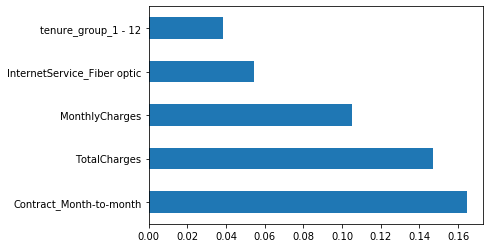

In [9]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

##### Train Test Split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
x_train.shape

(5625, 50)

#### Decision Tree Classifier

In [12]:
model_dt=DecisionTreeClassifier()

In [13]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [14]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
print("traninig Accuracy is : ", model_dt.score(x_train,y_train)*100)

traninig Accuracy is :  99.78666666666666


In [16]:
print("testing Accuracy is : ", model_dt.score(x_test,y_test)*100)

testing Accuracy is :  71.78393745557925


In [17]:
model_dt.score(x_test,y_test)

0.7178393745557925

In [18]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1035
           1       0.47      0.49      0.48       372

    accuracy                           0.72      1407
   macro avg       0.64      0.65      0.64      1407
weighted avg       0.72      0.72      0.72      1407



In [19]:
print(confusion_matrix(y_test, y_pred))

[[827 208]
 [189 183]]


###### As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

###### Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

###### Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [20]:
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x,y)

In [21]:
xr_train,xr_test,yr_train,yr_test=train_test_split(x_resampled,y_resampled,test_size=0.2)

In [22]:
model_dt_smote=DecisionTreeClassifier()

In [23]:
model_dt_smote.fit(xr_train,yr_train)

DecisionTreeClassifier()

In [24]:
y_pred_smote=model_dt_smote.predict(xr_test)
y_pred_smote

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [25]:
print("traninig Accuracy is : ", model_dt_smote.score(xr_train,yr_train)*100)

traninig Accuracy is :  100.0


In [26]:
print("testing Accuracy is : ", model_dt_smote.score(xr_test,yr_test)*100)

testing Accuracy is :  94.39252336448598


In [27]:
model_dt_smote.score(xr_test,yr_test)

0.9439252336448598

In [28]:
print(classification_report(yr_test, y_pred_smote, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       524
           1       0.95      0.95      0.95       653

    accuracy                           0.94      1177
   macro avg       0.94      0.94      0.94      1177
weighted avg       0.94      0.94      0.94      1177



In [29]:
print(confusion_matrix(yr_test, y_pred_smote))

[[490  34]
 [ 32 621]]


###### Now we can see quite better results, i.e. Accuracy: 92 %, and a very good recall, precision & f1 score for minority class.

###### Let's try with some other classifier.

#### Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf_model=RandomForestClassifier()

In [32]:
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [33]:
yr_pred=rf_model.predict(x_test)

In [34]:
rf_model.score(x_test,y_test)

0.7718550106609808

In [35]:
print("tranini Accuracy is : ", rf_model.score(x_train,y_train)*100)

tranini Accuracy is :  99.78666666666666


In [36]:
print("testing Accuracy is : ", rf_model.score(x_test,y_test)*100)

testing Accuracy is :  77.18550106609808


In [38]:
print(classification_report(y_test, yr_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1035
           1       0.59      0.45      0.51       372

    accuracy                           0.77      1407
   macro avg       0.70      0.67      0.68      1407
weighted avg       0.76      0.77      0.76      1407



In [39]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [40]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [41]:
rf_model_smote=RandomForestClassifier()

In [42]:
rf_model_smote=RandomForestClassifier()

In [43]:
rf_model_smote.fit(xr_train1,yr_train1)

RandomForestClassifier()

In [44]:
yr_predict1 = rf_model_smote.predict(xr_test1)

In [45]:
model_score_r1 = rf_model_smote.score(xr_test1, yr_test1)

In [46]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9516129032258065
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       545
           1       0.95      0.96      0.96       633

    accuracy                           0.95      1178
   macro avg       0.95      0.95      0.95      1178
weighted avg       0.95      0.95      0.95      1178



In [47]:
print("testing Accuracy is : ", rf_model_smote.score(xr_test1,yr_test1)*100)

testing Accuracy is :  95.16129032258065


In [48]:
rf_model_smote.score(xr_test1,yr_test1)

0.9516129032258065

In [49]:
print(confusion_matrix(yr_test1, yr_predict1))

[[511  34]
 [ 23 610]]


#### XGBoost Classifier

In [50]:
from xgboost import XGBClassifier

In [51]:
xg_model=XGBClassifier(objective='binary:logistic')
xg_model.fit(x_train,y_train)

E:\Python\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:01:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
print("traninig Accuracy is : ", xg_model.score(x_train,y_train)*100)

traninig Accuracy is :  92.99555555555555


In [53]:
print("testing Accuracy is : ", xg_model.score(x_test,y_test)*100)

testing Accuracy is :  78.67803837953092


In [54]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1035
           1       0.47      0.49      0.48       372

    accuracy                           0.72      1407
   macro avg       0.64      0.65      0.64      1407
weighted avg       0.72      0.72      0.72      1407



## Hyperparameter Tuning
#### Choose Following method
1. RandomizedSearchCV -->fast
2. GridSearchCV


In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
param_grid={
    'learning_rate':[1,0.5,0.1,0.01],
    'max_depth':[3,5,10,20],
    'n_estimators':[10,50,100,200]
}

In [57]:
grid=RandomizedSearchCV(XGBClassifier(objective='binari:logistic'), param_grid, verbose=3)

In [58]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


E:\Python\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Python\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Python\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "E:\Python\lib\site-packages\xgboost\sklearn.py", line 1187, in 

[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=nan total time=   0.0s


E:\Python\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Python\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Python\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "E:\Python\lib\site-packages\xgboost\sklearn.py", line 1187, in 

[CV 4/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=1, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=1, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=1, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=1, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=1, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=nan total time=   0.0s


E:\Python\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Python\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Python\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "E:\Python\lib\site-packages\xgboost\sklearn.py", line 1187, in 

[CV 2/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=200;, score=nan total time=   0.0s


E:\Python\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Python\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "E:\Python\lib\site-packages\xgboost\sklearn.py", line 1187, in fit
    callbacks=callbacks,
  File "E:\Python\lib\site-packages\xgboost\training.py", line 197, in train
    early_stopping_rounds=early_stopping_rounds)
  File "E:\Python\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "E:\Python\lib\site-packages\xgboost\core.py", line 1501, in update
    dtrain.handle))
  File "E:\Python\lib\site-packages\xgboost\core.py", line 210, in _chec

[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=nan total time=   0.0s


E:\Python\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Python\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "E:\Python\lib\site-packages\xgboost\sklearn.py", line 1187, in fit
    callbacks=callbacks,
  File "E:\Python\lib\site-packages\xgboost\training.py", line 197, in train
    early_stopping_rounds=early_stopping_rounds)
  File "E:\Python\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "E:\Python\lib\site-packages\xgboost\core.py", line 1501, in update
    dtrain.handle))
  File "E:\Python\lib\site-packages\xgboost\core.py", line 210, in _chec

[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=nan total time=   0.0s


E:\Python\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Python\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "E:\Python\lib\site-packages\xgboost\sklearn.py", line 1187, in fit
    callbacks=callbacks,
  File "E:\Python\lib\site-packages\xgboost\training.py", line 197, in train
    early_stopping_rounds=early_stopping_rounds)
  File "E:\Python\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "E:\Python\lib\site-packages\xgboost\core.py", line 1501, in update
    dtrain.handle))
  File "E:\Python\lib\site-packages\xgboost\core.py", line 210, in _chec

[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s


E:\Python\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Python\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Python\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "E:\Python\lib\site-packages\xgboost\sklearn.py", line 1187, in 

[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s


XGBoostError: [00:02:14] C:\Users\Administrator\workspace\xgboost-win64_release_1.4.0\src\objective\objective.cc:26: Unknown objective function: `binari:logistic`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: reg:pseudohubererror
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear


In [59]:
grid.best_params_

{'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.01}

In [60]:
xg_model=XGBClassifier(n_estimators = 50, max_depth = 10, learning_rate = 1)
xg_model.fit(x_train,y_train)

[00:02:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
print("training Accuracy is : ", xg_model.score(x_train,y_train)*100)

training Accuracy is :  99.76888888888888


In [62]:
print("testing Accuracy is : ", xg_model.score(x_test,y_test)*100)

testing Accuracy is :  76.47476901208245


### Save model

In [63]:
import pickle

In [64]:
filename = 'final_model.pkl'
pickle.dump(rf_model_smote, open(filename, 'wb'))

In [65]:
load_model = pickle.load(open(filename, 'rb'))

In [66]:
load_model.score(xr_test1,yr_test1)

0.9516129032258065